In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

## 第一题

In [2]:
num = 101
interval = 100 / (num - 1)
np.random.seed(100)

In [3]:
# 生成布朗过程轨道
# 默认T的区间是[0, 100]
def Brown_Process(interval, c):
    zengliang = np.random.normal(loc=0, scale=c*interval, size=int(num - 1))
    G = np.append(0, zengliang)
    # for index_t in range(zengliang.shape[0]):
    G = np.array([np.sum(G[0 : index_t+1]) for index_t in range(G.shape[0])])

    return G

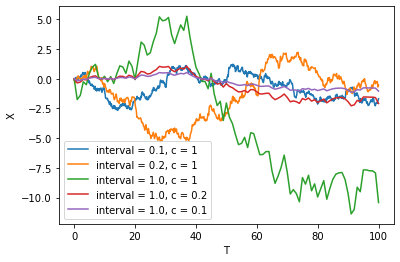

In [4]:

for [num, c] in [[1001, 1], [501, 1], [101, 1], [101, 0.2], [101, 0.1]]:
    np.random.seed(100)
    T = np.linspace(0, 100, int(num))
    X = Brown_Process(100/(num-1), c)
    plt.plot(T, X, label='interval = '+ str(100/(num-1)) + ', c = ' + str(c))
    plt.xlabel('T')
    plt.ylabel('X')
    plt.legend()
plt.savefig(r'./figs/多条布朗运动轨道.jpg')
plt.show()
plt.close()

## 第二题

In [46]:
def SDE1(d_t=1.0):
    d_B = np.random.normal(loc=0, scale=d_t, size=100)
    R = np.zeros(d_B.shape[0]+1)
    R[0] = x_0
    for index_t in range(100):
        R[index_t+1] = R[index_t] + alpha*(v - R[index_t])*d_t + sigma*d_B[index_t]

    return R

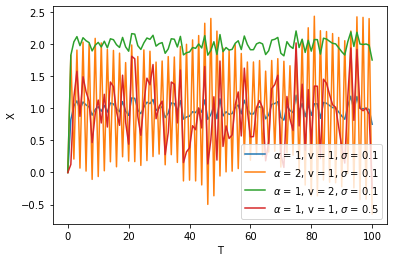

In [50]:
d_t = 1.0
for [alpha, v, sigma, x_0] in [[1, 1, 0.1, 0], [2, 1, 0.1, 0], [1, 2, 0.1, 0], [1, 1, 0.5, 0]]:
    np.random.seed(100)
    T = np.linspace(0, 100*d_t, 101)
    X = SDE1(d_t)
    plt.plot(T, X, label=r'$\alpha$ = %s, v = %s, $\sigma$ = %s'%(str(alpha), str(v), str(sigma)))
    plt.xlabel('T')
    plt.ylabel('X')
    plt.legend()
plt.savefig(r'./figs/随机微分方程解1的多条轨道.jpg')
plt.show()

In [7]:
[alpha, v, sigma, x_0] = [1, 10, 2, 1]
MC_SDE1 = np.zeros(1000)
for seed in range(1000):
    np.random.seed(seed)
    MC_SDE1[seed] = SDE1(d_t)[1]
Expection = np.mean(MC_SDE1)
print(Expection)
Variance = np.var(MC_SDE1)
print(Variance)

9.973862103255895
3.936259936763773


## 第三题

In [17]:
def SDE2(d_t=1.0):
    d_B = np.random.normal(loc=0, scale=d_t, size=100)
    d_W = np.random.normal(loc=0, scale=d_t, size=100)
    X = np.zeros(d_B.shape[0]+1)
    S = np.zeros(d_B.shape[0]+1)
    X[0] = x_0
    S[0] = s_0
    for index_t in range(100):
        X[index_t+1] = X[index_t] + alpha*(v - X[index_t])*d_t + sigma*d_B[index_t]
        S[index_t+1] = S[index_t] + theta*(X[index_t] - S[index_t])*d_t + sigma_1*d_B[index_t] + sigma_2*d_W[index_t]


    return X, S

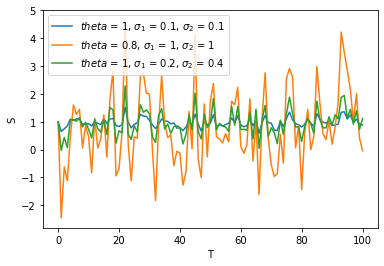

In [51]:
d_t = 1.0
for [alpha, v, sigma, theta, sigma_1, sigma_2, x_0, s_0] in [[1, 1, 0.1, 1, 0.1, 0.1, 1, 1], 
                                                            [1, 1, 0.1, 0.8, 1, 1, 1, 1], 
                                                            [1, 1, 0.1, 1, 0.2, 0.4, 1, 1]]:
    np.random.seed(100)
    T = np.linspace(0, 100*d_t, 101)
    X, S = SDE2(d_t)
    plt.plot(T, S, label=r'$theta$ = %s, $\sigma_1$ = %s, $\sigma_2$ = %s'%(str(theta), str(sigma_1), str(sigma_2)))
    plt.xlabel('T')
    plt.ylabel('S')
    plt.legend()
plt.savefig(r'./figs/随机微分方程解2的多条轨道S-T.jpg')
plt.show()
plt.close()


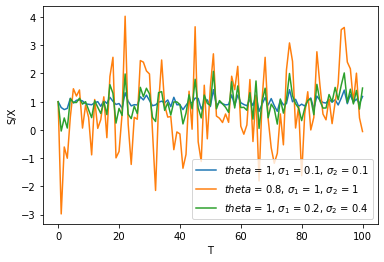

In [52]:
d_t = 1.0
for [alpha, v, sigma, theta, sigma_1, sigma_2, x_0, s_0] in [[1, 1, 0.1, 1, 0.1, 0.1, 1, 1], 
                                                            [1, 1, 0.1, 0.8, 1, 1, 1, 1], 
                                                            [1, 1, 0.1, 1, 0.2, 0.4, 1, 1]]:
    np.random.seed(100)
    T = np.linspace(0, 100*d_t, 101)
    X, S = SDE2(d_t)
    ratio = [S[index_t]/X[index_t] for index_t in range(X.shape[0])]
    plt.plot(T, ratio, label=r'$theta$ = %s, $\sigma_1$ = %s, $\sigma_2$ = %s'%(str(theta), str(sigma_1), str(sigma_2)))
    plt.xlabel('T')
    plt.ylabel('S/X')
    plt.legend()
plt.savefig(r'./figs/随机微分方程解2的多条轨道Ratio-T.jpg')
plt.show()

In [28]:
[alpha, v, sigma, x_0] = [1, 10, 2, 1]
MC_SDE2 = np.zeros(1000)
for seed in range(1000):
    np.random.seed(seed)
    X, S = SDE2(d_t)
    MC_SDE2[seed] = S[1]
Expection = np.mean(MC_SDE2)
print(Expection)
Variance = np.var(MC_SDE2)
print(Variance)

1.1164299069262025
20.033115803508647
